In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.columns = ['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [7]:
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,State,Profit
RD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


## Scatterplot between the variables with their histograms

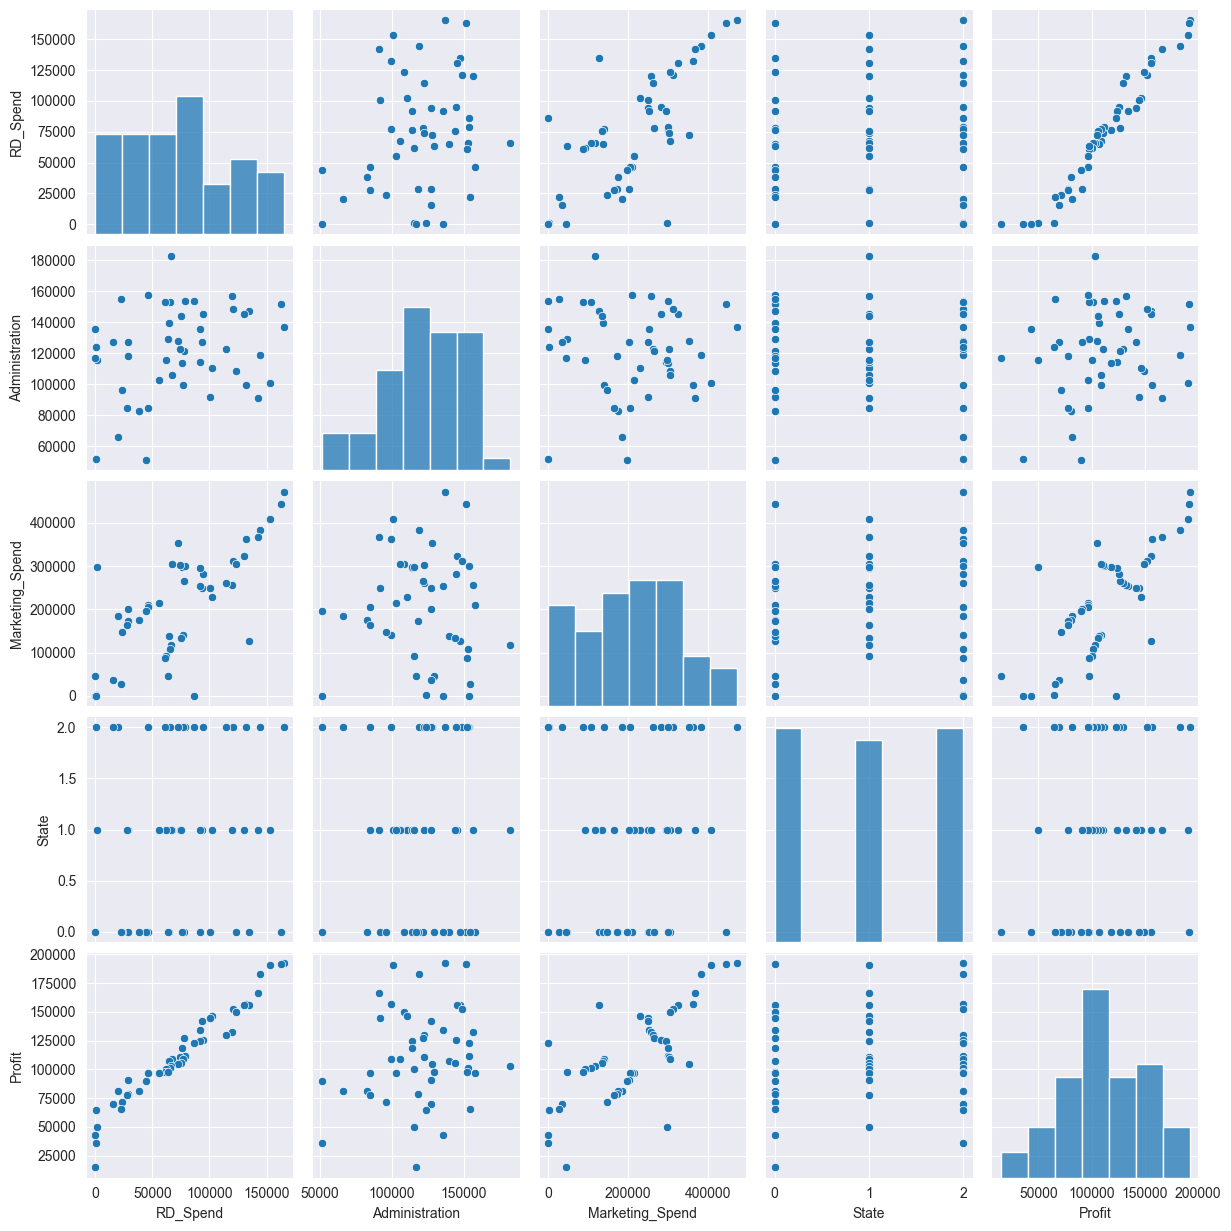

In [9]:
#Format the plot background and scatter plots for all the variables
sn.set_style(style='darkgrid')
sn.pairplot(data)

The variables R&D_Spend and Marketing_Spend has high correlation. Since both of them are regressors this could cause Multi-Collinearity Issues while training.

## Preparing a model

In [10]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data).fit()

In [11]:
#Coefficients
model.params

Intercept          50142.506443
RD_Spend               0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.368962
RD_Spend           17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64 
 Intercept          2.900008e-09
RD_Spend           8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

## Simple Linear Regression Models

The p value of the variables Administration, Marketing_Spend, and State are more than 0.05. So we need to check if is because of the variable itself or any other factor. We can check for the p values of each variable individually and confirm this.

### For variable RD_Spend

In [14]:
ml_rd=smf.ols('Profit~RD_Spend',data = data).fit()  
#t and p-Values
print(ml_rd.tvalues, '\n', ml_rd.pvalues)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


### For variable Administration

In [15]:
ml_a=smf.ols('Profit~Administration',data = data).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


The p value is higher than 0.05 which makes this variable insignificant for this analysis. Since the correlation of this variable to the Profit variable is also less we can ignore this.

### For variable Marketing_Spend

In [16]:
ml_m=smf.ols('Profit~Marketing_Spend',data = data).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


The p value is much lower than 0.05 which makes this variable significant for this analysis. The higher p value in the initial analysis must be due to the correlation between this variable and the RD_Spend variable. We need to check for the VIF to decide which variable should be removed.

### For variable State

In [17]:
ml_s=smf.ols('Profit~State',data = data).fit()  
#t and p-Values
print(ml_s.tvalues, '\n', ml_s.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


The p value is more than 0.05 which makes this variable insignificant for this analysis. Since the correlation of this variable to the Profit variable is also less we can ignore this.

## Calculating the VIFs

In [18]:
rsq_rd = smf.ols('RD_Spend~Administration+Marketing_Spend+State',data=data).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_a = smf.ols('Administration~RD_Spend+Marketing_Spend+State',data=data).fit().rsquared  
vif_a = 1/(1-rsq_a)

rsq_ms = smf.ols('Marketing_Spend~RD_Spend+Administration+State',data=data).fit().rsquared  
vif_ms = 1/(1-rsq_ms)

rsq_s = smf.ols('State~RD_Spend+Administration+Marketing_Spend',data=data).fit().rsquared  
vif_s = 1/(1-rsq_s)

d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend','State'],'VIF':[vif_rd,vif_a,vif_ms,vif_s]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.481178
1,Administration,1.175315
2,Marketing_Spend,2.326780
3,State,1.011281


The variable Weight has the highest VIF among the Weight and Doors pair which means it should be removed but considering that it has very high correlation with Price compared to that of Doors. So, Doors can be removed instead of weight.

And between the variable Weight and Quarterly_Tax, Weight has higher VIF but both have some meaningful correlation with price.

Finally we can continue with Age_08_04, KM, HP, Quarterly_Tax, Weight for the training process.

---------------------------
Not much change in the r-squared and the adjusted r-squared values even the Doors variable is removed. And we are getting a pretty decent score in both the models.

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

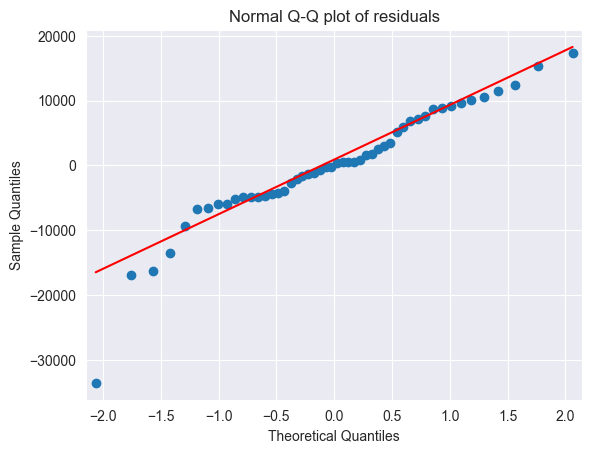

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

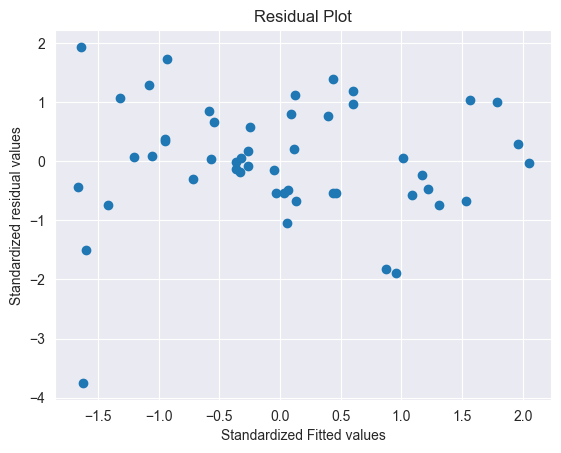

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Points are equally distributed around the 0 which means that the average is 0. So, the model_new works fine.

### Residual Vs Regressors

eval_env: 1


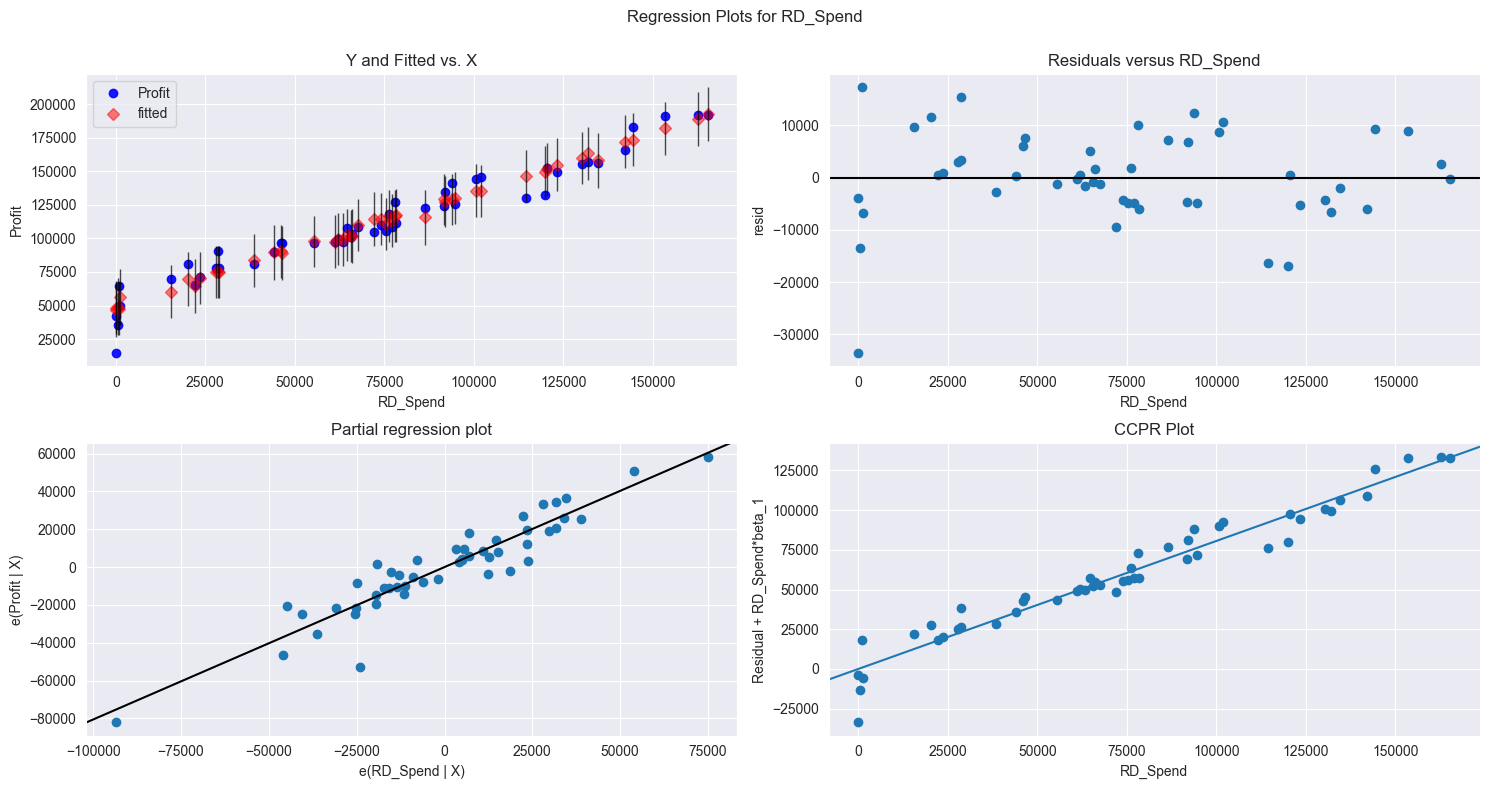

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

eval_env: 1


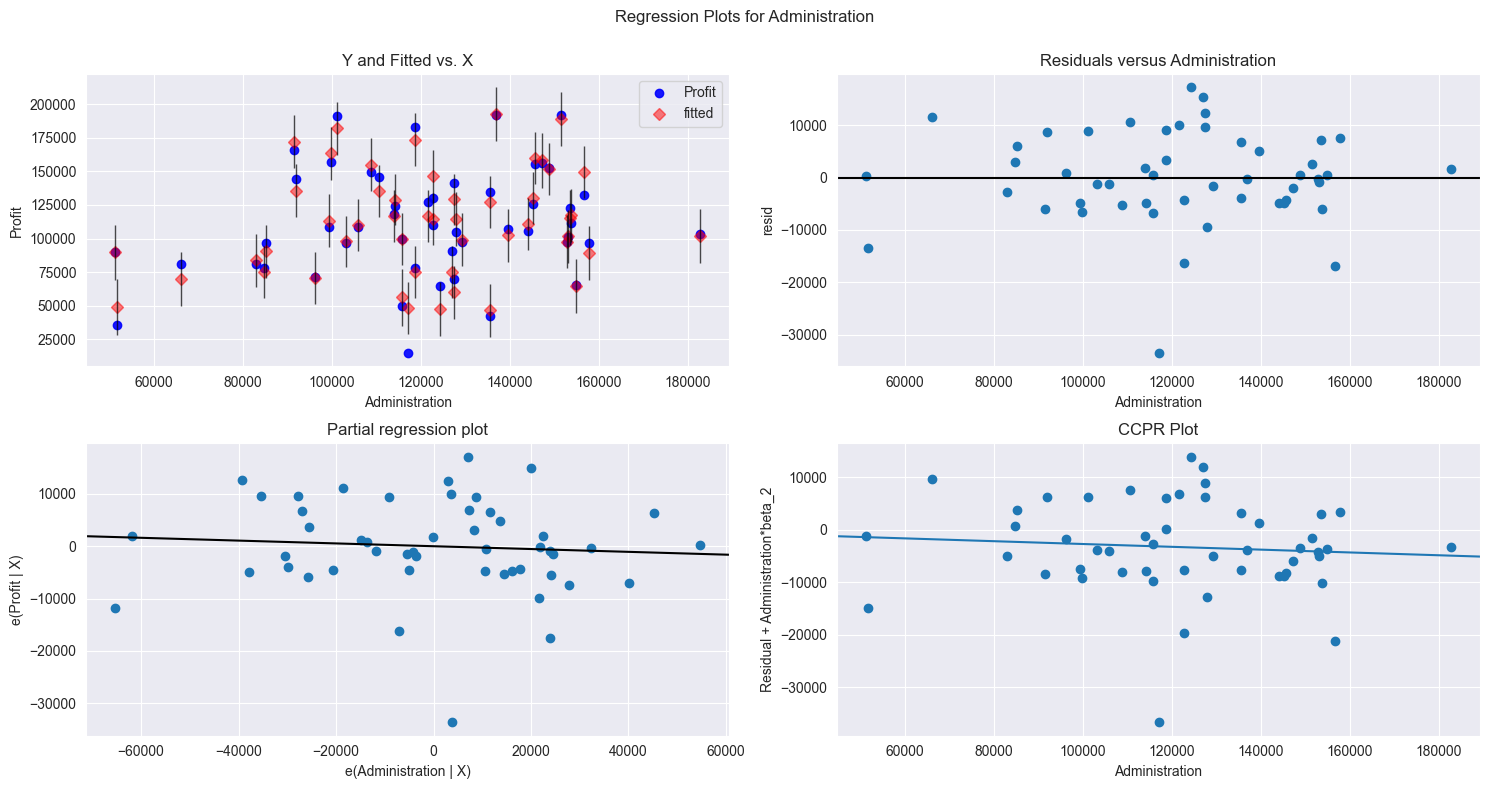

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


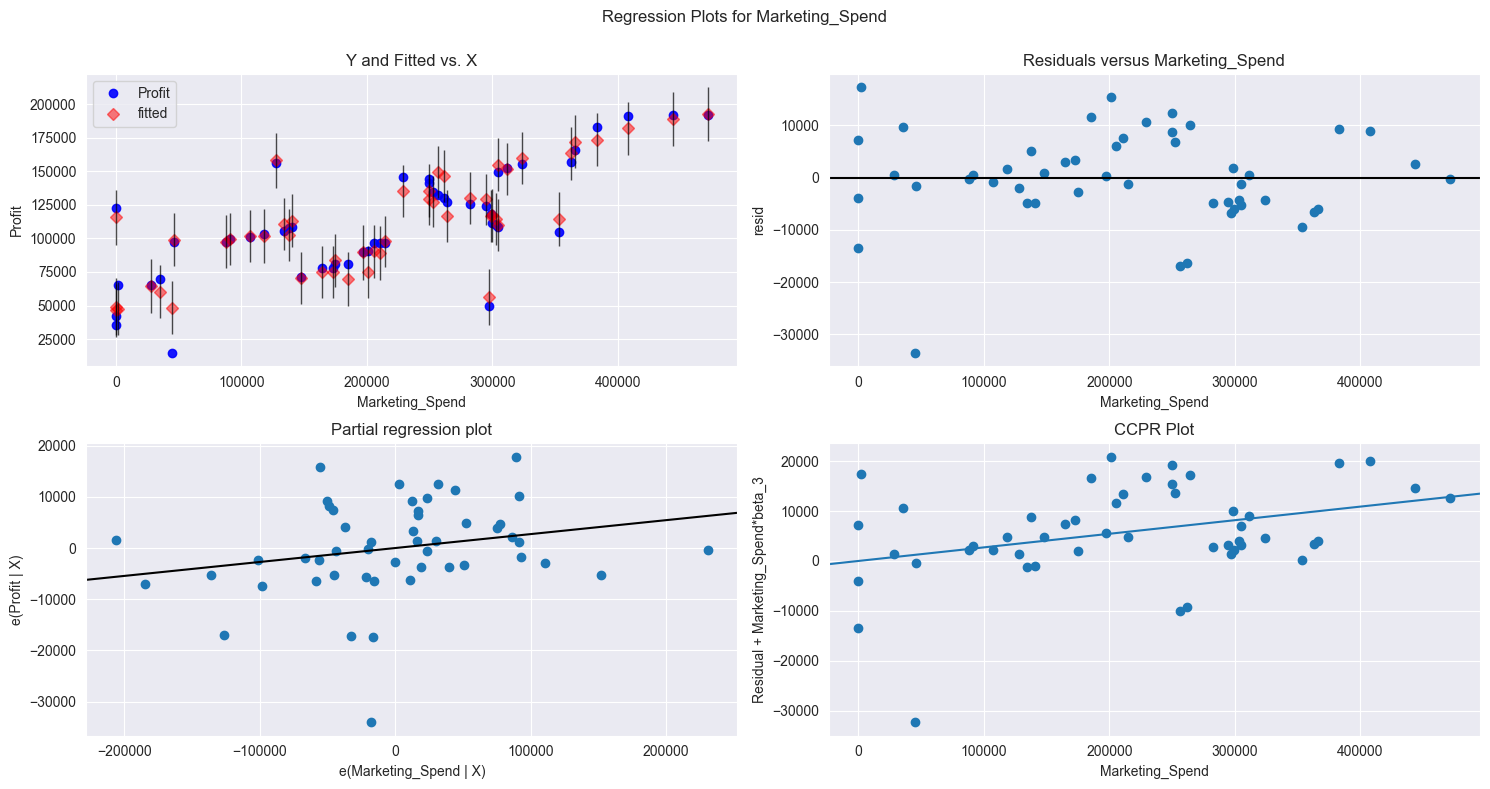

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

eval_env: 1


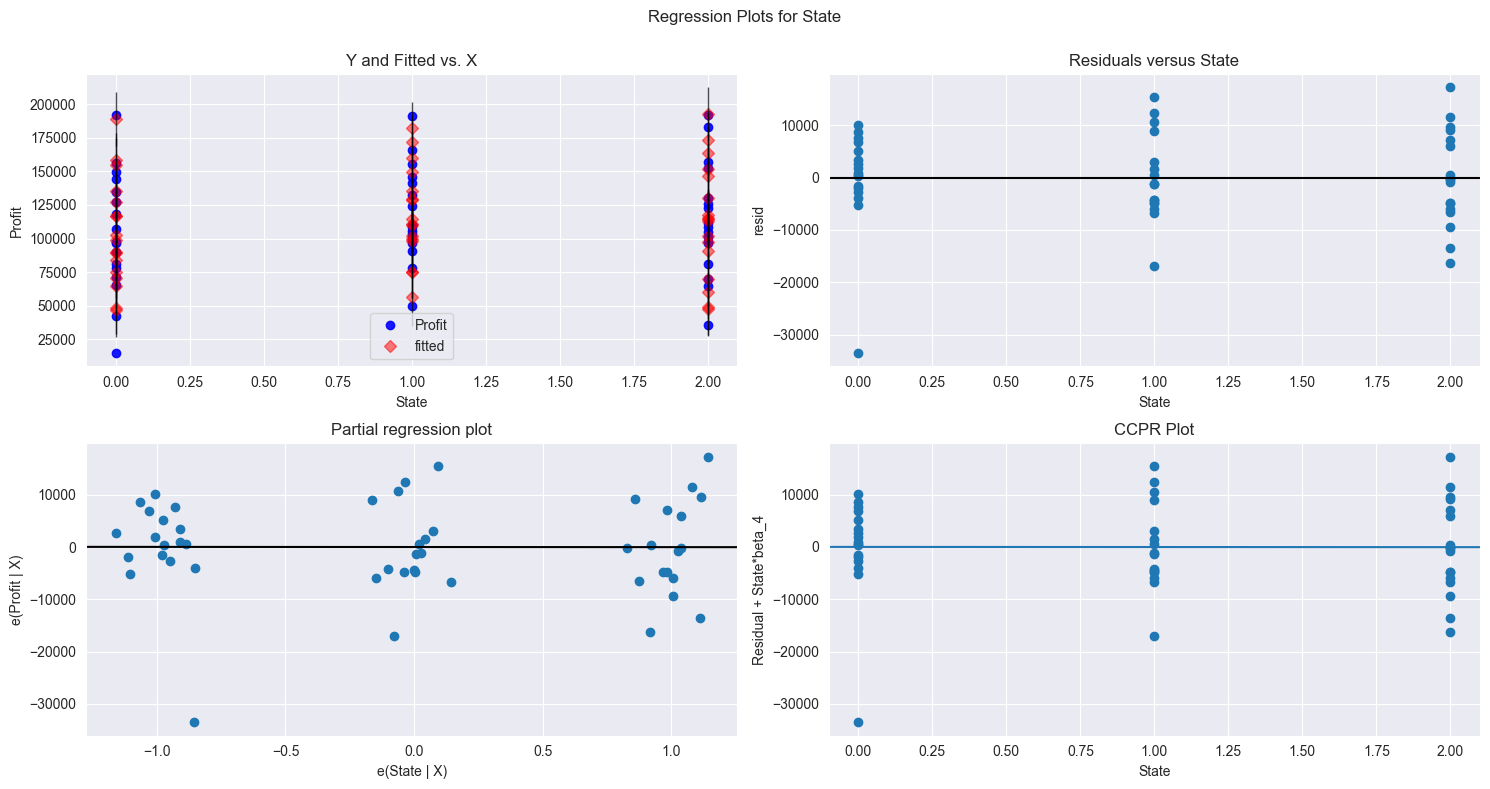

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting Influencers or Outliers

### Cook’s Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

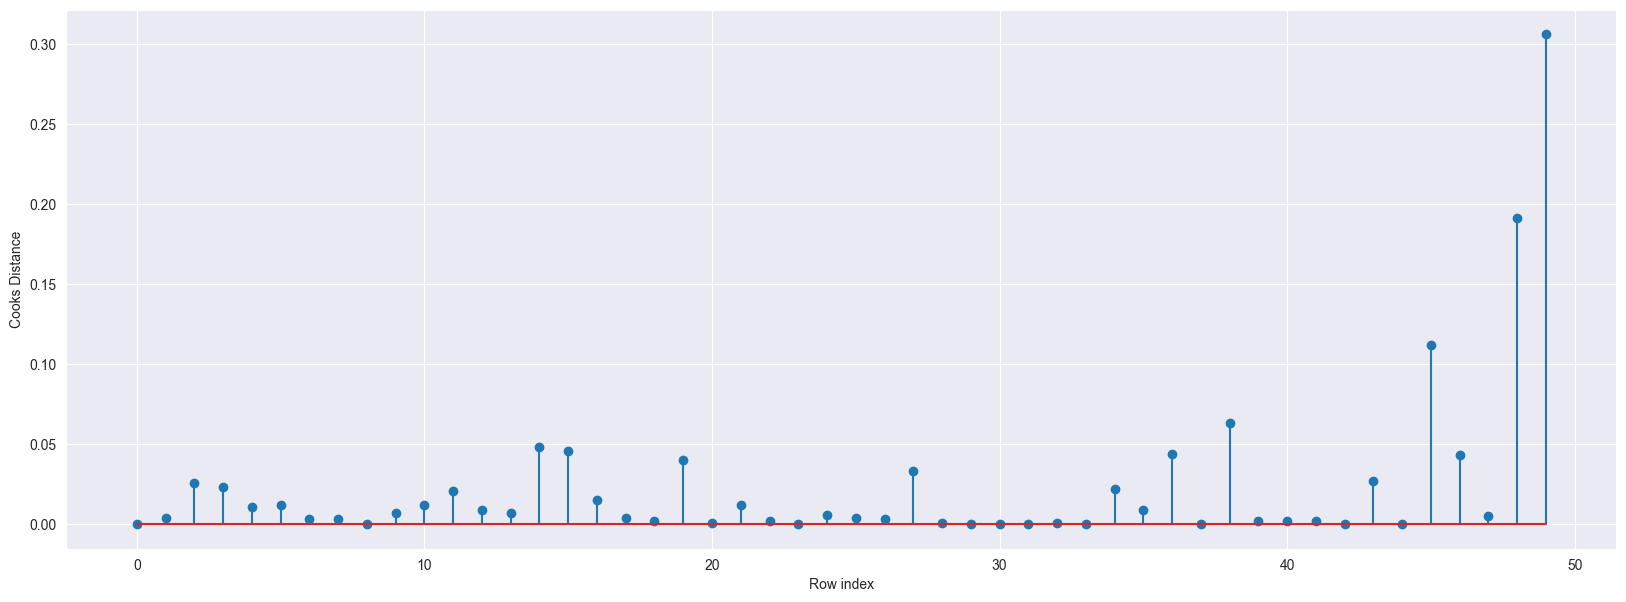

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

### High Influence points

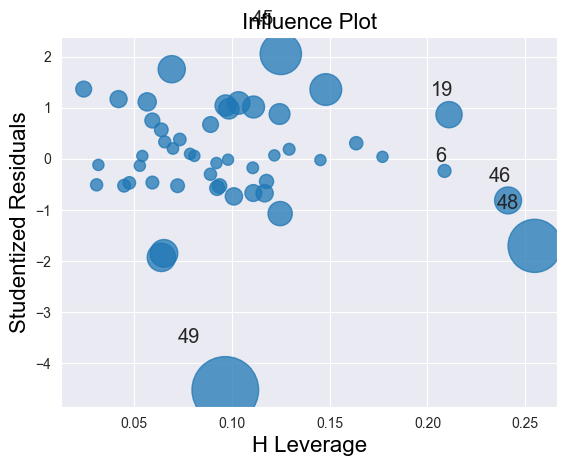

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
k = 4 
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.30000000000000004

In [32]:
data[data.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


## Improving the model

In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data=data.drop(data.index[[49]],axis=0).reset_index()

In [34]:
#Drop the original index
data=data.drop(['index'],axis=1)

In [35]:
data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


## Build Model

In [36]:
final_ml= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data = data).fit()

In [37]:
#Again check for influencers
model_influence_1 = final_ml.get_influence()
(c1, _) = model_influence_1.cooks_distance 

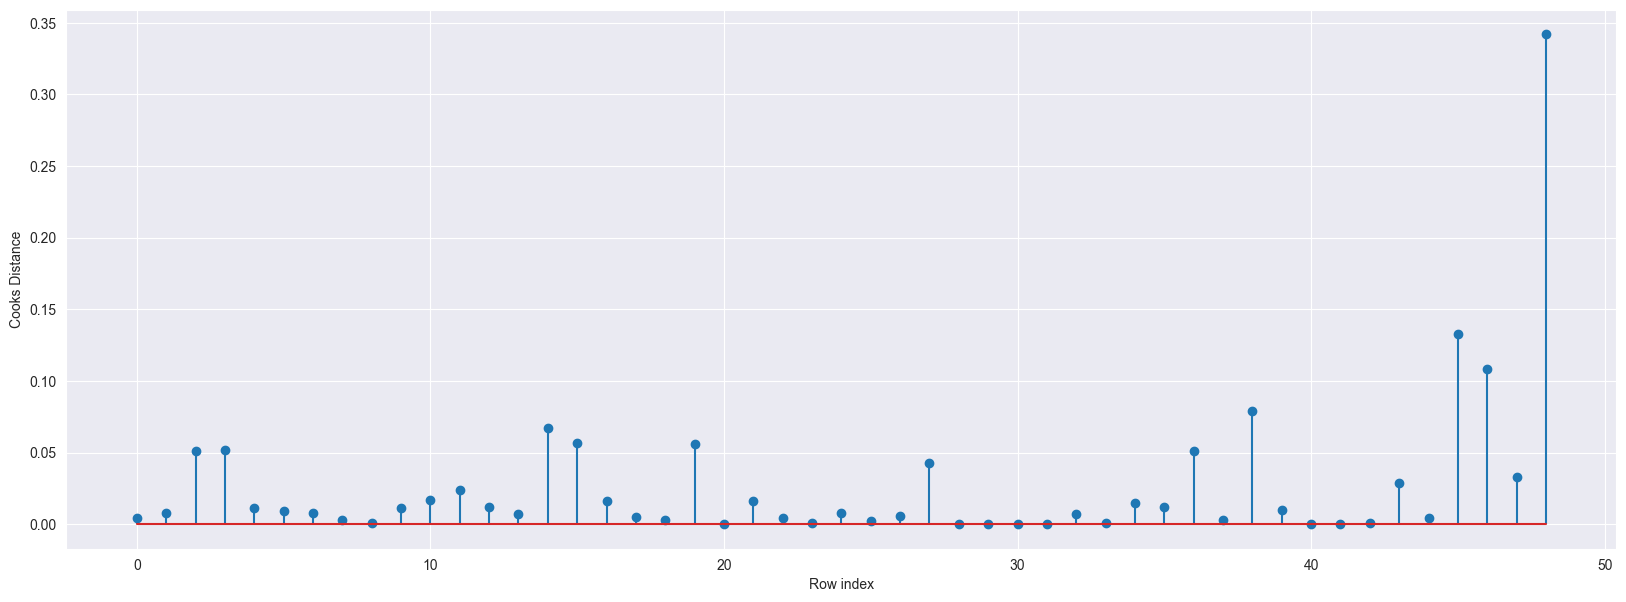

In [38]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance'); 

In [39]:
(np.argmax(c1),np.max(c1))

(48, 0.34222735319801867)

In [40]:
data[data.index.isin([48])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.0,2,35673.41


In [41]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data=data.drop(data.index[[48]],axis=0).reset_index()

In [42]:
#Drop the original index
data=data.drop(['index'],axis=1)

In [43]:
data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [44]:
final_ml2= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data = data).fit()

In [45]:
#Again check for influencers
model_influence_2 = final_ml2.get_influence()
(c2, _) = model_influence_2.cooks_distance 

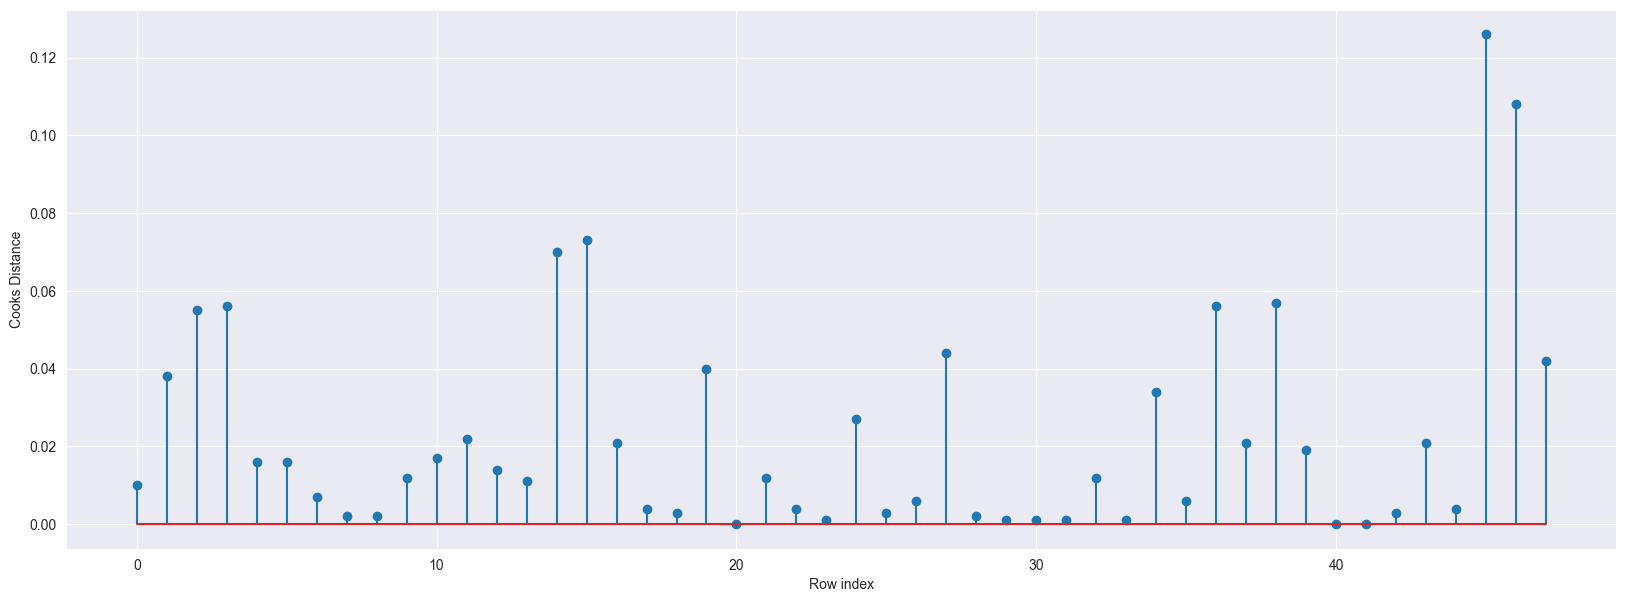

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance'); 

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [47]:
final_ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           4.18e-30
Time:                        14:21:01   Log-Likelihood:                -493.30
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.927e+04   6021.622      9.843      0.000    4.71e+04    7.14e+04
RD_Spend            0.7898      0.037     21.480      0.000       0.716       0.864
Administration     -0.0626      0.045     -1.406      0.167      -0.152       0.027
Marketing_Spend     0.0171      0.014      1.245      0.220      -0.011       0.045
State            -326.7063   1325.527     -0.246      0.806   -2999.886    2346.473
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.517
Skew:                           0.081   Prob(JB):                        0.772
Kurtosis:                       2.518   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 --------------
An improved r-squared value that before

## Predicting for new data

In [48]:
pred_y = final_ml2.predict(data)

In [49]:
pred_y

0     188691.663530
1     185790.357535
2     180761.889557
3     171753.791062
4     171708.114064
5     162717.763405
6     158559.692036
7     158272.223695
8     149831.701814
9     155082.931380
10    136424.223066
11    137298.242571
12    129372.671089
13    127757.998367
14    148255.711836
15    145861.378816
16    117785.682202
17    129119.646686
18    129293.693104
19    117267.454225
20    117465.065644
21    116019.622202
22    114875.417079
23    110862.030119
24    115652.834437
25    103964.340304
26    111706.919945
27    113590.607882
28    101698.661089
29    102684.958141
30    102226.363396
31     98853.225539
32    102052.449581
33     99985.392712
34     89665.884676
35     93142.748488
36     77062.371770
37     94228.717421
38     73627.499062
39     87516.520738
40     77510.048275
41     78478.229533
42     74447.533771
43     63499.266821
44     67583.597381
45     51671.175165
46     57802.163395
47     50796.675392
dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error
print('The RMSE value is', np.sqrt(mean_squared_error(data['Profit'], pred_y)))

The RMSE value is 7031.51962525359


### Applying Ridge Regularization

In [62]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge

data1 = pd.read_csv('50_Startups.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Profit'], axis = 1)
y = data1['Profit']
# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x, y) 
y_pred = ridgeR.predict(x) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y)**2) 
print(np.sqrt(mean_squared_error_ridge))

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

8854.763141309846
            Columns  Coefficient Estimate
0         R&D Spend              0.806005
1    Administration             -0.026993
2   Marketing Spend              0.026995
3  State_California            -48.974758
4     State_Florida            137.641686
5    State_New York            -88.666929


### Applying Lasso Regularization

In [65]:
from sklearn.linear_model import Lasso 

data1 = pd.read_csv('50_Startups.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Profit'], axis = 1)
y = data1['Profit']

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x, y) 
y_pred1 = lasso.predict(x) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y)**2) 
print("Root mean squared error on test set", np.sqrt(mean_squared_error))
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Root mean squared error on test set 8854.761382669136
            Columns  Coefficient Estimate
0         R&D Spend              0.806014
1    Administration             -0.027000
2   Marketing Spend              0.026985
3  State_California             -0.000000
4     State_Florida            195.447023
5    State_New York            -38.972818


### Applying Elastic Net Regularization

In [67]:
# import model 
from sklearn.linear_model import ElasticNet 

data1 = pd.read_csv('50_Startups.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Profit'], axis = 1)
y = data1['Profit']

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x, y) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x) 
mean_squared_error = np.mean((y_pred_elastic - y)**2) 
print("Root mean Squared Error on test set", np.sqrt(mean_squared_error))

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Root mean Squared Error on test set 8854.851463675825


,Columns,Coefficient Estimate
0,R&D Spend,0.805903
1,Administration,-0.026930
2,Marketing Spend,0.027078
3,State_California,-30.521453
4,State_Florida,88.988247
5,State_New York,-57.466795


-------------

The results did not improve after applying the regularization techniques